In [30]:
# Mushroom classification with Artifical Neural Network

#%%
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Load the data

filename = 'mushrooms_data.txt'

h_names=['class', 'cap-shape', 'Cap-surface','cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size','gill-color', 'stalk-shape', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
data = pd.read_csv(filename,names = h_names)

# Split the data (features/label)
features = data.drop('odor',axis=1)
label = list(data['odor'])

# Get all columns in features set
features_cols = features.columns

# Onehot encode all features columns
from sklearn.preprocessing import LabelEncoder
def onehot_all_cols(cols):
    encoder = LabelEncoder()
    for col in cols:
        features[col] = encoder.fit_transform(features[col])

# Encode labels
def onehot_labels(label):
    return pd.get_dummies(label)

onehot_all_cols(features_cols)
label = onehot_labels(label)

# Build the model
from keras.models import Model
from keras.layers import Dense, Input

# Define input shape
inputs = Input(shape=(21,))

# Hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(inputs, predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

# Fit the model
model.fit(features, label, batch_size=64, validation_split=0.2, epochs=50)

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                1408      
_________________________________________________________________
dense_73 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 9)                 297       
Total params: 7,945
Trainable params: 7,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
82/82 [==============================] - 0s 2ms/step - loss: 1.1295 - categorical_accuracy: 0.6572 - val_l

82/82 [==============================] - 0s 998us/step - loss: 0.1145 - categorical_accuracy: 0.9200 - val_loss: 0.7589 - val_categorical_accuracy: 0.6831
Epoch 45/50
82/82 [==============================] - 0s 880us/step - loss: 0.1173 - categorical_accuracy: 0.9133 - val_loss: 1.1633 - val_categorical_accuracy: 0.6715
Epoch 46/50
82/82 [==============================] - 0s 907us/step - loss: 0.1153 - categorical_accuracy: 0.9163 - val_loss: 0.7821 - val_categorical_accuracy: 0.6754
Epoch 47/50
82/82 [==============================] - 0s 926us/step - loss: 0.1143 - categorical_accuracy: 0.9184 - val_loss: 0.8592 - val_categorical_accuracy: 0.6777
Epoch 48/50
82/82 [==============================] - 0s 940us/step - loss: 0.1151 - categorical_accuracy: 0.9173 - val_loss: 0.9265 - val_categorical_accuracy: 0.6785
Epoch 49/50
82/82 [==============================] - 0s 926us/step - loss: 0.1150 - categorical_accuracy: 0.9140 - val_loss: 0.8102 - val_categorical_accuracy: 0.6746
Epoch 50/5

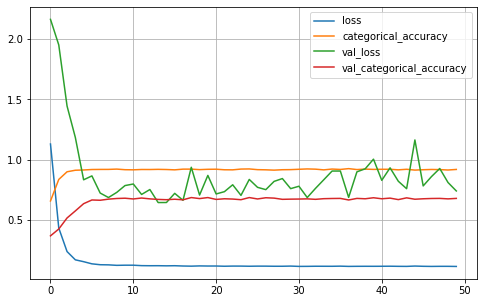

In [31]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()